# Measure Spoken Word Timing

The purpose of this notebook is to measure how long the speaker takes to speak a word. This metric might be useful to determine when Gentle fails to align the audio and text.

In [1]:
import sys

# Setup the "PYTHONPATH"
sys.path.insert(0, '../../')

%matplotlib inline

In [67]:
from pathlib import Path

import json

from src.audio import read_audio
sample_rate = 44100
alignment = Path('../../data/Hillary/.gentle/Scripts 34-39.json')
audio = Path('../../data/Hillary Source/wavs/Scripts 34-39.wav')

assert alignment.is_file()
assert audio.is_file()

alignment = json.loads(alignment.read_text())
audio = read_audio(audio, sample_rate=sample_rate)

No config for `audio.read_audio` (`src.audio.read_audio`)


In [68]:
seconds_to_samples = lambda seconds: int(round(seconds * sample_rate))

get_spoken_word_timing = lambda w: (w['end'] - w['start']) / (w['endOffset'] - w['startOffset'])

def is_aligned(word, min_spoken_word_timing=0.06):
    if word['case'] != 'success' or word['alignedWord'] == '<unk>':
        return False

    if get_spoken_word_timing(word) < min_spoken_word_timing:
        return False

    return True

**Text:** "that sense"

**Timing:** 65838654 → 65850561 → 65850561 → 65870847

**Both Words Audio:**

No config for `visualize.plot_waveform` (`src.utils.visualize.plot_waveform`)


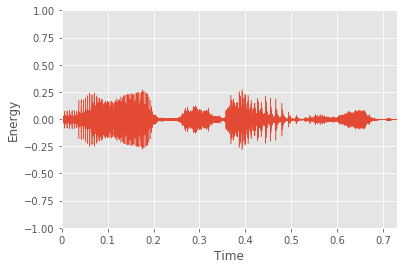

**Extended Audio:**

No config for `visualize.plot_waveform` (`src.utils.visualize.plot_waveform`)


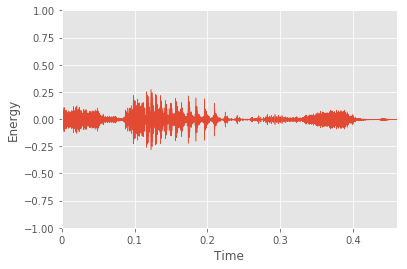

**Regular Audio:**

No config for `visualize.plot_waveform` (`src.utils.visualize.plot_waveform`)


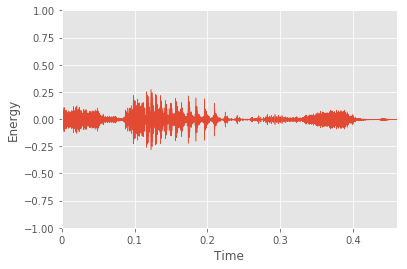

----------------------------------------------------------------------------------------------------

**Text:** "a competitive"

**Timing:** 89641629 → 89649126 → 89649126 → 89678232

**Both Words Audio:**

No config for `visualize.plot_waveform` (`src.utils.visualize.plot_waveform`)


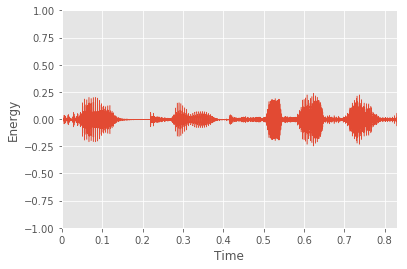

**Extended Audio:**

No config for `visualize.plot_waveform` (`src.utils.visualize.plot_waveform`)


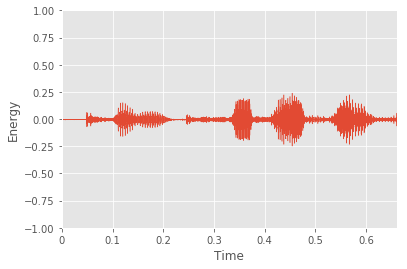

**Regular Audio:**

No config for `visualize.plot_waveform` (`src.utils.visualize.plot_waveform`)


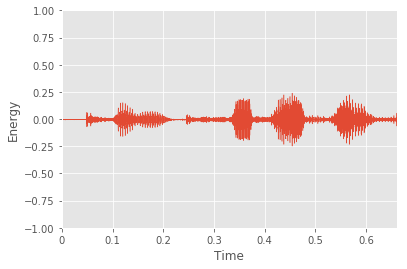

----------------------------------------------------------------------------------------------------

**Text:** "of social"

**Timing:** 99938979 → 99947358 → 99947358 → 99964998

**Both Words Audio:**

No config for `visualize.plot_waveform` (`src.utils.visualize.plot_waveform`)


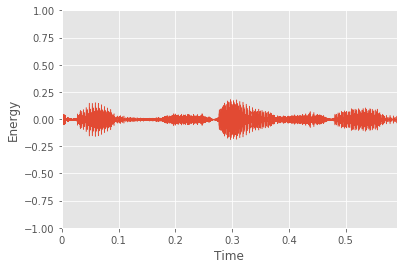

**Extended Audio:**

No config for `visualize.plot_waveform` (`src.utils.visualize.plot_waveform`)


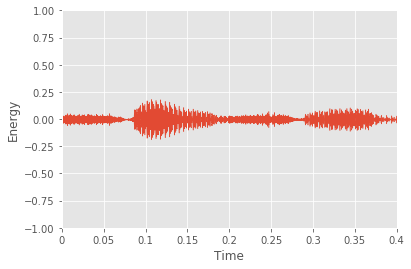

**Regular Audio:**

No config for `visualize.plot_waveform` (`src.utils.visualize.plot_waveform`)


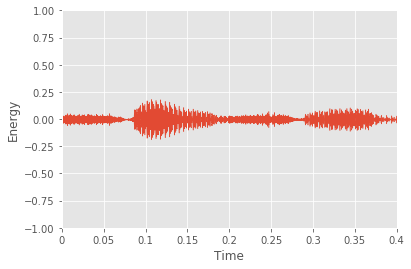

----------------------------------------------------------------------------------------------------

**Text:** "you must"

**Timing:** 162704304 → 162713124 → 162713124 → 162726795

**Both Words Audio:**

No config for `visualize.plot_waveform` (`src.utils.visualize.plot_waveform`)


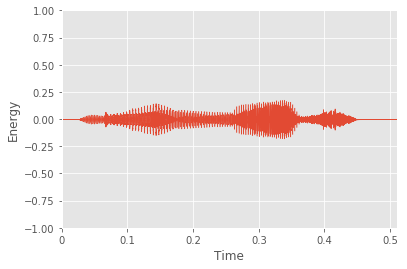

**Extended Audio:**

No config for `visualize.plot_waveform` (`src.utils.visualize.plot_waveform`)


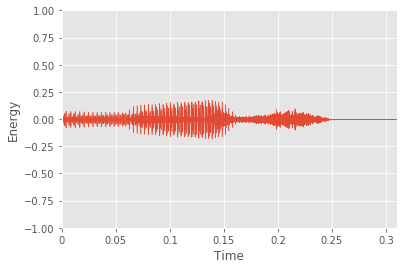

**Regular Audio:**

No config for `visualize.plot_waveform` (`src.utils.visualize.plot_waveform`)


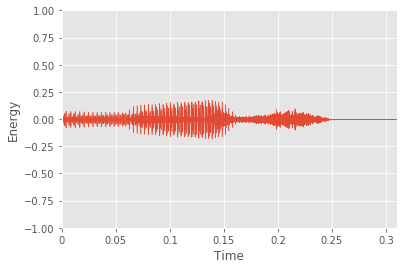

----------------------------------------------------------------------------------------------------

**Text:** "of ignoring"

**Timing:** 164247804 → 164255742 → 164255742 → 164283966

**Both Words Audio:**

No config for `visualize.plot_waveform` (`src.utils.visualize.plot_waveform`)


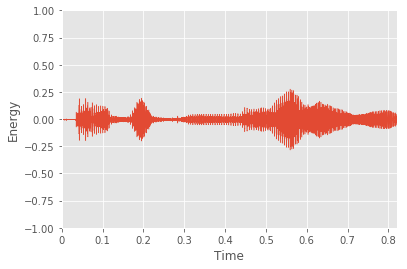

**Extended Audio:**

No config for `visualize.plot_waveform` (`src.utils.visualize.plot_waveform`)


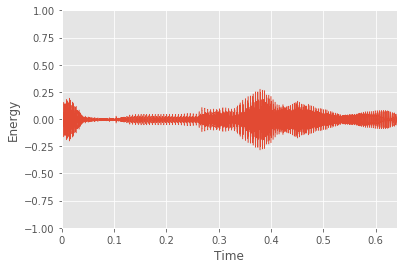

**Regular Audio:**

No config for `visualize.plot_waveform` (`src.utils.visualize.plot_waveform`)


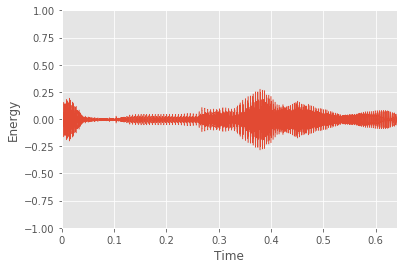

----------------------------------------------------------------------------------------------------

**Text:** "retail sale"

**Timing:** 91971873 → 91997451 → 91997451 → 92015091

**Both Words Audio:**

No config for `visualize.plot_waveform` (`src.utils.visualize.plot_waveform`)


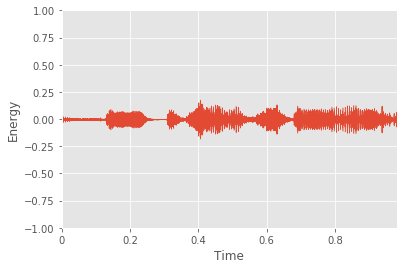

**Extended Audio:**

No config for `visualize.plot_waveform` (`src.utils.visualize.plot_waveform`)


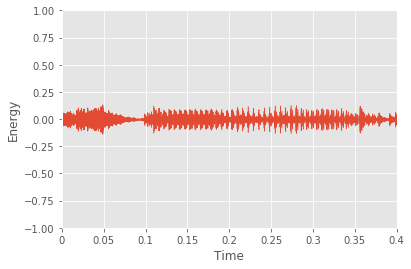

**Regular Audio:**

No config for `visualize.plot_waveform` (`src.utils.visualize.plot_waveform`)


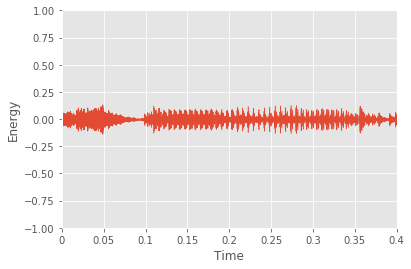

----------------------------------------------------------------------------------------------------

**Text:** "and soil"

**Timing:** 92637783 → 92649249 → 92649249 → 92665125

**Both Words Audio:**

No config for `visualize.plot_waveform` (`src.utils.visualize.plot_waveform`)


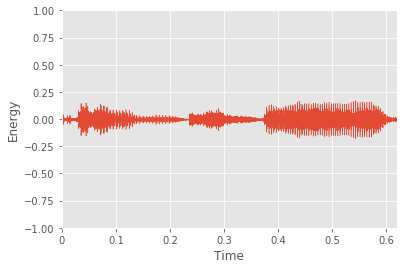

**Extended Audio:**

No config for `visualize.plot_waveform` (`src.utils.visualize.plot_waveform`)


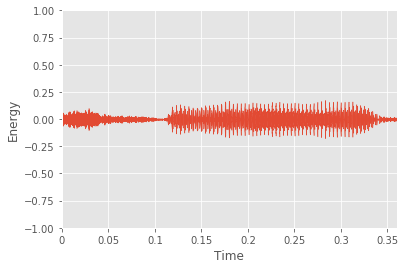

**Regular Audio:**

No config for `visualize.plot_waveform` (`src.utils.visualize.plot_waveform`)
/Users/michaelp/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


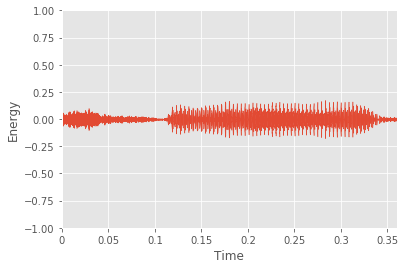

----------------------------------------------------------------------------------------------------

**Text:** "from several"

**Timing:** 93602691 → 93614598 → 93614598 → 93633120

**Both Words Audio:**

No config for `visualize.plot_waveform` (`src.utils.visualize.plot_waveform`)


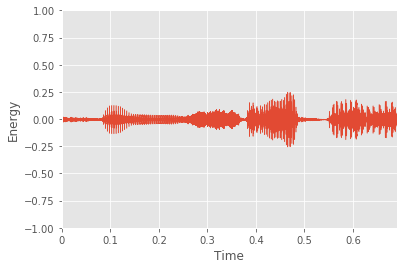

**Extended Audio:**

No config for `visualize.plot_waveform` (`src.utils.visualize.plot_waveform`)


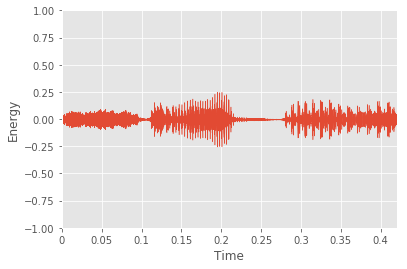

**Regular Audio:**

No config for `visualize.plot_waveform` (`src.utils.visualize.plot_waveform`)


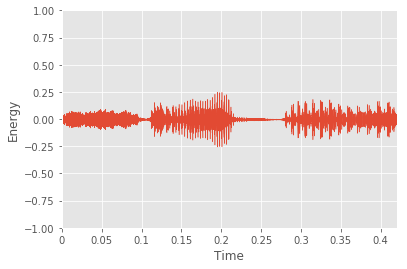

----------------------------------------------------------------------------------------------------

**Text:** "of regulatory"

**Timing:** 94224501 → 94231116 → 94231116 → 94263750

**Both Words Audio:**

No config for `visualize.plot_waveform` (`src.utils.visualize.plot_waveform`)


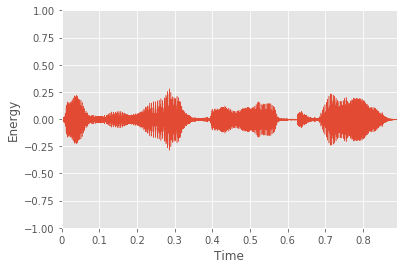

**Extended Audio:**

No config for `visualize.plot_waveform` (`src.utils.visualize.plot_waveform`)


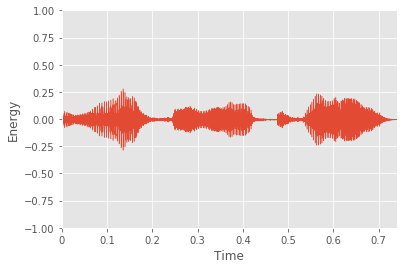

**Regular Audio:**

No config for `visualize.plot_waveform` (`src.utils.visualize.plot_waveform`)


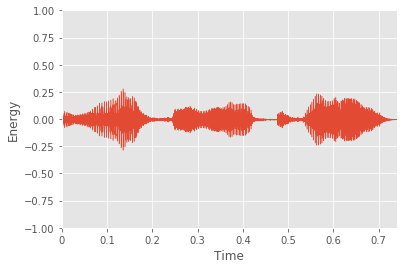

----------------------------------------------------------------------------------------------------

**Text:** "like the"

**Timing:** 95891922 → 95905152 → 95905152 → 95919705

**Both Words Audio:**

No config for `visualize.plot_waveform` (`src.utils.visualize.plot_waveform`)


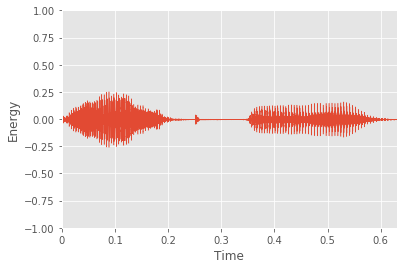

**Extended Audio:**

No config for `visualize.plot_waveform` (`src.utils.visualize.plot_waveform`)


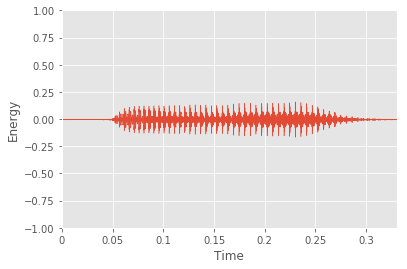

**Regular Audio:**

No config for `visualize.plot_waveform` (`src.utils.visualize.plot_waveform`)


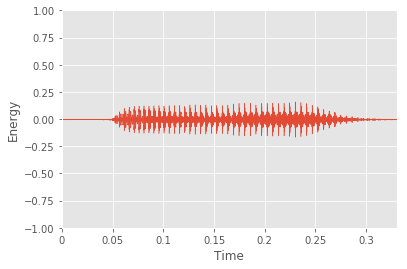

----------------------------------------------------------------------------------------------------

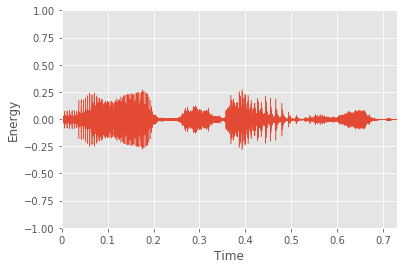

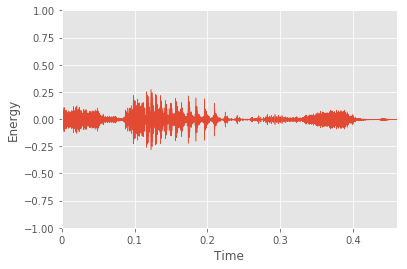

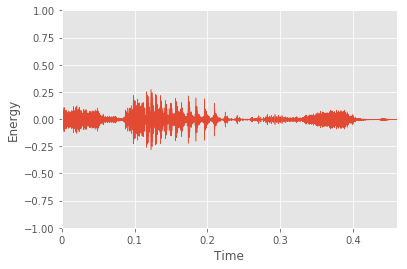

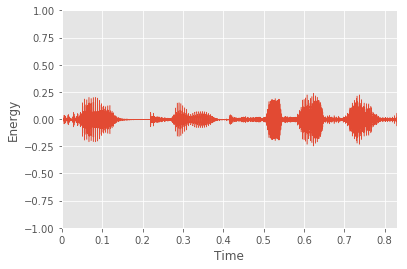

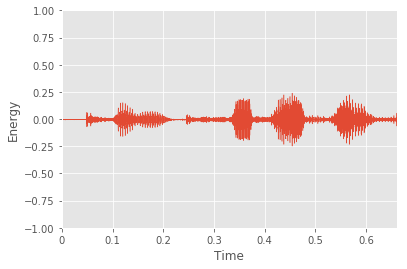

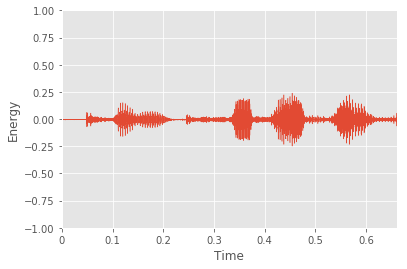

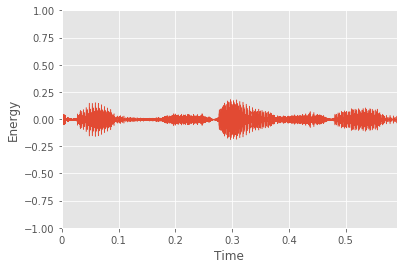

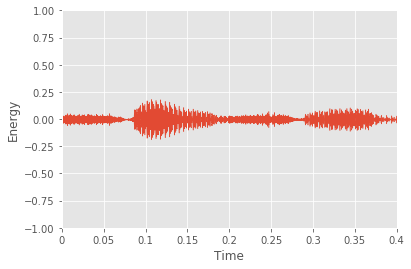

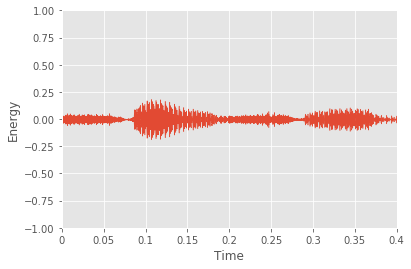

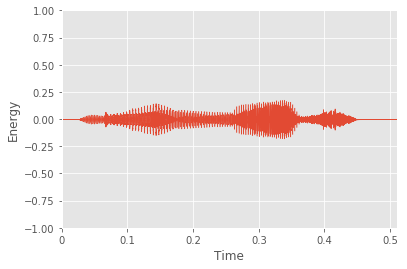

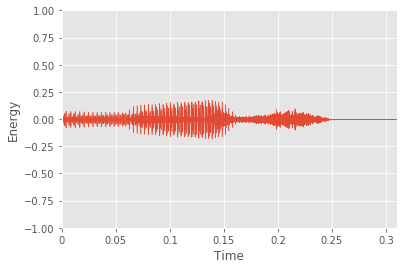

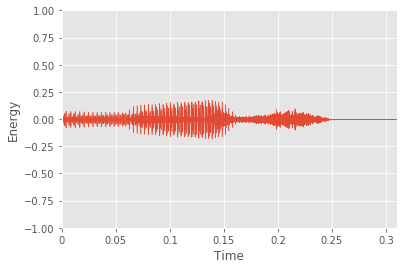

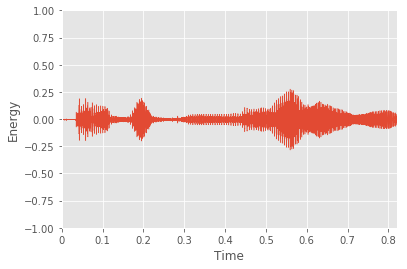

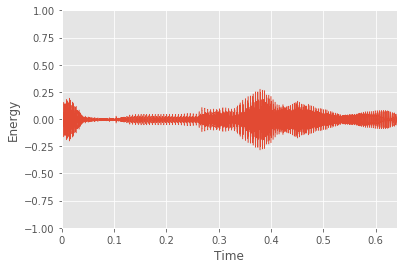

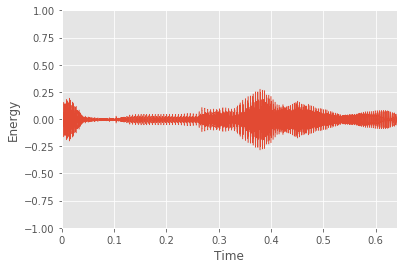

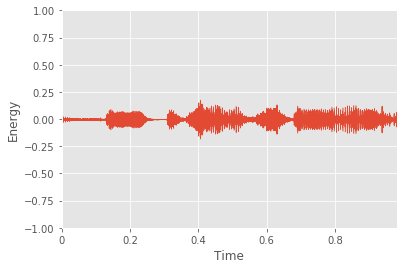

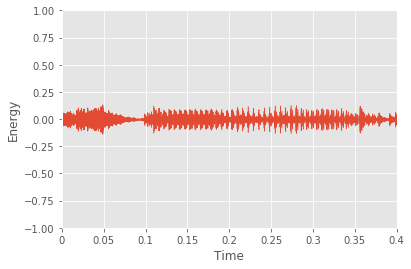

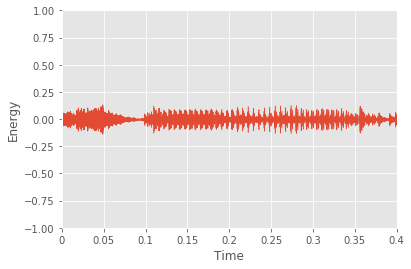

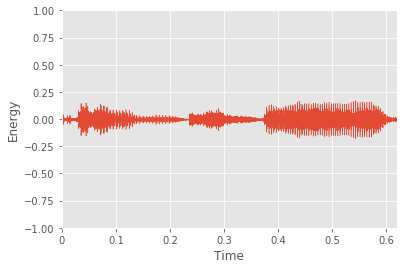

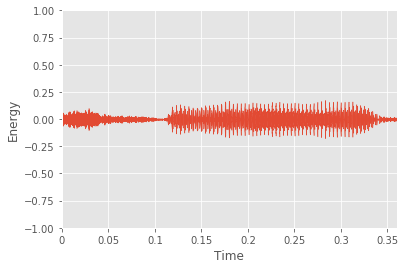

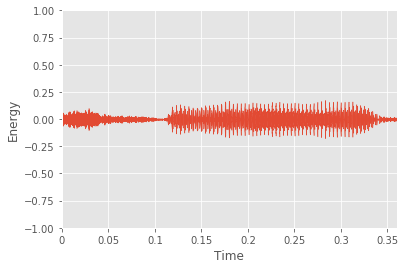

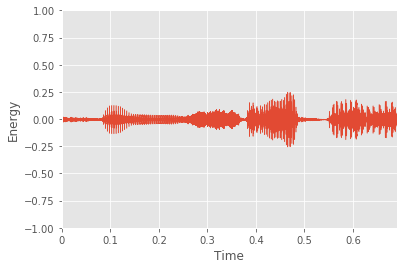

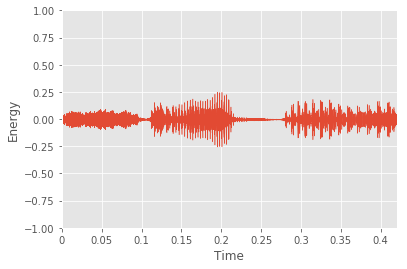

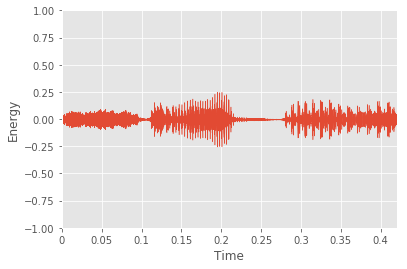

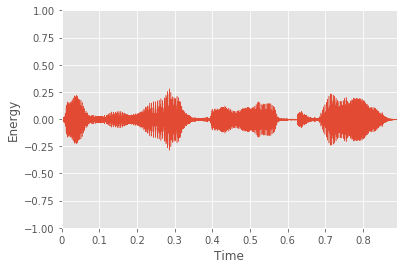

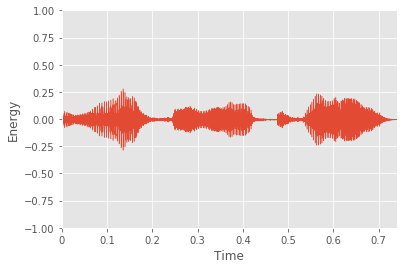

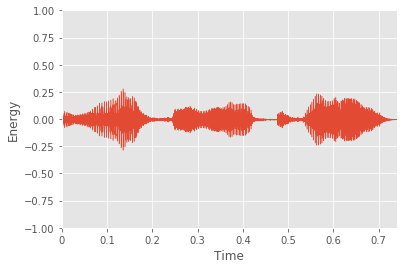

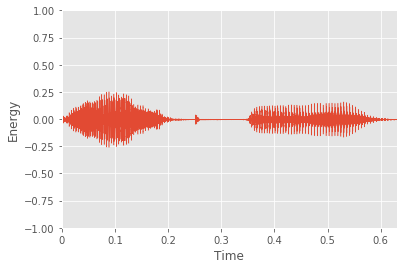

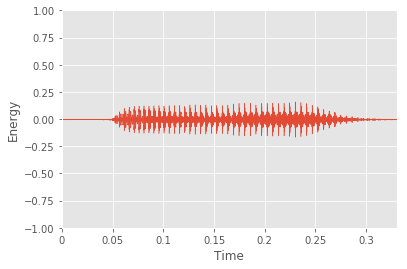

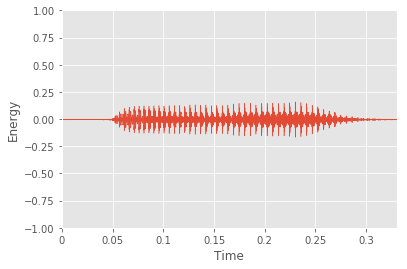

In [87]:
from IPython.display import Audio
from IPython.display import Markdown

import json
import statistics
import pprint
import random

from src.utils.visualize import plot_waveform

pprint = pprint.PrettyPrinter(indent=2)
words = alignment['words']
aligned_transition_words = []

for i in range(1, len(words)):
    if is_aligned(words[i - 1]) and is_aligned(words[i]):
        words[i]['lastWord'] = words[i - 1]
        aligned_transition_words.append(words[i])
        
aligned_transition_words = sorted(aligned_transition_words,
                                  key=lambda w: w['start'] - w['lastWord']['end'])

for word in aligned_transition_words[:10]:
    start_last_sample = seconds_to_samples(word['lastWord']['start'])
    end_last_sample = seconds_to_samples(word['lastWord']['end'])
    start_sample = seconds_to_samples(word['start'])
    end_sample = seconds_to_samples(word['end'])
    display(Markdown('**Text:** "' + word['lastWord']['word'] + ' ' + word['word'] + '"'))
    display(Markdown('**Timing:** %s → %s → %s → %s' % (start_last_sample, end_last_sample,
                                                        start_sample, end_sample)))
    display(Markdown('**Both Words Audio:**'))
    display(Audio(data=audio[start_last_sample:end_sample], rate=sample_rate))
    display(plot_waveform(audio[start_last_sample:end_sample], sample_rate=sample_rate))
    display(Markdown('**Extended Audio:**'))
    display(Audio(data=audio[end_last_sample:end_sample], rate=sample_rate))
    display(plot_waveform(audio[end_last_sample:end_sample], sample_rate=sample_rate))
    display(Markdown('**Regular Audio:**'))
    display(Audio(data=audio[start_sample:end_sample], rate=sample_rate))
    display(plot_waveform(audio[start_sample:end_sample], sample_rate=sample_rate))
    display(Markdown('-' * 100))

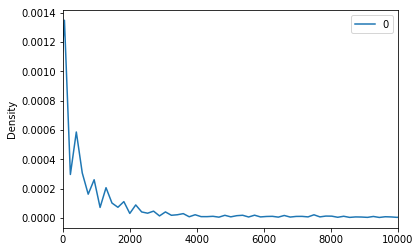

In [66]:
import pandas as pd
transitions = [seconds_to_samples(w['start'] - w['lastWord']['end']) for w in aligned_transition_words]
pd.DataFrame(transitions).plot.density(xlim=(0.0, 10000), bw_method=0.01)